In [83]:
import pickle, os

In [84]:
import torch

In [85]:
import matplotlib.pyplot as plt

In [86]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [87]:
results = pickle.load(open(os.path.join(root,'tmp','predictions.pkl'),'rb'))

In [88]:
results[0][0]['y_hat'].shape

torch.Size([4, 150, 1])

In [89]:
tensors = {'y_hat':[],'y':[]}
for t in results[0]:
    if len(t['y_hat'].squeeze().shape)==2:
        tensors['y_hat'].append(t['y_hat'].squeeze())
    elif len(t['y_hat'].squeeze().shape)<2:
        tensors['y_hat'].append(t['y_hat'].squeeze().unsqueeze(0))
        
    if len(t['y'].squeeze().shape)==2:
        tensors['y'].append(t['y'].squeeze())
    elif len(t['y'].squeeze().shape)<2:
        tensors['y'].append(t['y'].squeeze().unsqueeze(0))

In [90]:
y_hat = torch.cat(tensors['y_hat'])
y = torch.cat(tensors['y'])

(array([   0.,    0.,    0.,    0.,    0., 8250.,    0.,    0.,    0.,
           0.]),
 array([0.34348214, 0.44348213, 0.5434821 , 0.64348215, 0.7434821 ,
        0.84348214, 0.94348216, 1.0434822 , 1.1434821 , 1.2434821 ,
        1.3434821 ], dtype=float32),
 <BarContainer object of 10 artists>)

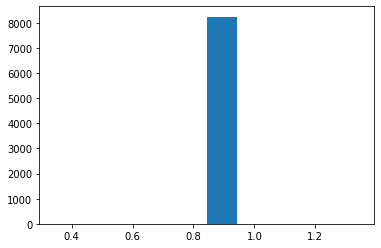

In [91]:
plt.hist(y_hat.numpy().flatten())

In [92]:
y.shape

torch.Size([55, 150])

In [93]:
(y[:,0]<1).sum()

tensor(27)

In [94]:
y_hat[y[:,0]==1,0].mean() # => 1 -> there is a steel plant at t=0

tensor(0.8435)

In [95]:
y_hat[y[:,0]<1,0].mean() # => 0 -> there is no steel plant at t=0

tensor(0.8435)

In [81]:
y

tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [82]:
y_hat

tensor([[0.9035, 0.9035, 0.9035,  ..., 0.9035, 0.9035, 0.9035],
        [0.9035, 0.9035, 0.9035,  ..., 0.9035, 0.9035, 0.9035],
        [0.9035, 0.9035, 0.9035,  ..., 0.9035, 0.9035, 0.9035],
        ...,
        [0.9035, 0.9035, 0.9035,  ..., 0.9035, 0.9035, 0.9035],
        [0.9035, 0.9035, 0.9035,  ..., 0.9035, 0.9035, 0.9035],
        [0.9035, 0.9035, 0.9035,  ..., 0.9035, 0.9035, 0.9035]])